# **0. API 선언**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

R=1 #랜덤 스테이트

# **1. 데이터 로드 및 표준화**

### 1-1. 데이터 불러오기

In [2]:
# 데이터파일 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #데이터셋 다운로드

test_images.resize(10000,784)
test_labels.resize(10000,1)
test_data = np.concatenate((test_labels, test_images), axis = 1)

df = pd.DataFrame(test_data) #테스트 데이터만 사용(10000개)

df.rename(columns={0:'label'}, inplace=True)
print(df)

#-------------------------------------------------------------------------------
Top_df = df.copy() #상의 분류용 데이터셋
for i in (1,5,7,8,9):
  Top_idx = Top_df[Top_df['label'] == i].index
  Top_df = Top_df.drop(Top_idx)
#Top_df.loc[Top_df['label'] == 6, 'label'] = 0 #3차 분류용
#Top_df.loc[Top_df['label'] == 4, 'label'] = 2
print(Top_df)
#-------------------------------------------------------------------------------
Shoes_df = df.copy() #신발 분류용 데이터셋
for i in (0,1,2,3,4,6,8):
  Shoes_idx = Shoes_df[Shoes_df['label'] == i].index
  Shoes_df = Shoes_df.drop(Shoes_idx)
print(Shoes_df)
#-------------------------------------------------------------------------------
First_df = df.copy() #1차 분류용 데이터셋
First_df.rename(columns={0:'label'}, inplace=True)
for i in (0,2,3,4,6) :
  First_df.loc[First_df['label'] == i, 'label'] = 0
for i in (5,7,9) :
  First_df.loc[First_df['label'] == i, 'label'] = 5
print(First_df)
#-------------------------------------------------------------------------------
Shirt_df = df.copy() #티셔츠:셔츠 분류용 데이터셋(미사용)
for i in (1,2,3,4,5,7,8,9):
  Shirt_idx = Shirt_df[Shirt_df['label'] == i].index
  Shirt_df = Shirt_df.drop(Shirt_idx)
print(Shirt_df)
#-------------------------------------------------------------------------------
SweCoat_df = df.copy() #스웨터:코트 분류용 데이터셋(미사용)
SweCoat_df.rename(columns={0:'label'}, inplace=True)
for i in (0,1,3,5,6,7,8,9):
  SweCoat_idx = SweCoat_df[SweCoat_df['label'] == i].index
  SweCoat_df = SweCoat_df.drop(SweCoat_idx)
print(SweCoat_df)

#print(df)


4431872/4422102 [==============================] - 0s 0us/step
      label  1  2  3  4  5  6  7  ...  777  778  779  780  781  782  783  784
0         9  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
1         2  0  0  0  0  0  0  0  ...    0    3  174  189   67    0    0    0
2         1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
3         1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
4         6  0  0  0  2  0  1  1  ...    0    0    0    0    0    0    0    0
...     ... .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
9995      9  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
9996      1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
9997      8  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
9998      1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
9999      5  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0



### 1-2. 데이터 분할

In [3]:
X = df.iloc[:, 1:].values     # 데이터샘플
y = df.iloc[:, 0].values      # 타겟레이블

Top_X = Top_df.iloc[:, 1:].values     # 데이터샘플
Top_y = Top_df.iloc[:, 0].values      # 타겟레이블

Shoes_X = Shoes_df.iloc[:, 1:].values     # 데이터샘플
Shoes_y = Shoes_df.iloc[:, 0].values      # 타겟레이블

First_X = First_df.iloc[:, 1:].values     # 데이터샘플
First_y = First_df.iloc[:, 0].values      # 타겟레이블

Shirt_X = Shirt_df.iloc[:, 1:].values     # 데이터샘플
Shirt_y = Shirt_df.iloc[:, 0].values      # 타겟레이블

SweCoat_X = SweCoat_df.iloc[:, 1:].values     # 데이터샘플
SweCoat_y = SweCoat_df.iloc[:, 0].values      # 타겟레이블

#-------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=R, stratify=y) #50%로 학습 테스트 데이터 쪼갬

Top_x_train, Top_x_test, Top_y_train, Top_y_test = train_test_split(
    Top_X, Top_y, test_size=0.5, random_state=R, stratify=Top_y) #50%로 학습 테스트 데이터 쪼갬

Shoes_x_train, Shoes_x_test, Shoes_y_train, Shoes_y_test = train_test_split(
    Shoes_X, Shoes_y, test_size=0.5, random_state=R, stratify=Shoes_y) #50%로 학습 테스트 데이터 쪼갬

First_x_train, First_x_test, First_y_train, First_y_test = train_test_split(
    First_X, First_y, test_size=0.5, random_state=R, stratify=First_y) #50%로 학습 테스트 데이터 쪼갬

Shirt_x_train, Shirt_x_test, Shirt_y_train, Shirt_y_test = train_test_split(
    Shirt_X, Shirt_y, test_size=0.5, random_state=R, stratify=Shirt_y) #50%로 학습 테스트 데이터 쪼갬

SweCoat_x_train, SweCoat_x_test, SweCoat_y_train, SweCoat_y_test = train_test_split(
    SweCoat_X, SweCoat_y, test_size=0.5, random_state=R, stratify=SweCoat_y) #50%로 학습 테스트 데이터 쪼갬

### 1-3. Data Argumentation

In [4]:
def data_argu (x_train, y_train, x_test, y_test) :#좌우반전 데이터 추가
  temp = np.reshape(x_train,(len(x_train)*28,28))
  temp = np.fliplr(temp).copy()
  temp = np.reshape(temp,(len(x_train),784))

  x_train = np.append(x_train, temp, axis=0) 
  y_train = np.append(y_train, y_train, axis=0)
 
  return x_train, y_train, x_test, y_test  

Top_x_train, Top_y_train, Top_x_test, Top_y_test= data_argu(Top_x_train, Top_y_train, Top_x_test, Top_y_test) #상의 데이터 Argumentation

### 1-4. 데이터 표준화

In [5]:
# 각 특성값을 표준화:
sc = StandardScaler() 
sc.fit(x_train) #x_train 데이터의 평균값 표준편차 얻음
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

sc.fit(Top_x_train) #Top_x_train 데이터의 평균값 표준편차 얻음
Top_x_train_std = sc.transform(Top_x_train)
Top_x_test_std = sc.transform(Top_x_test)

sc.fit(Shoes_x_train) #Shoes_x_train 데이터의 평균값 표준편차 얻음
Shoes_x_train_std = sc.transform(Shoes_x_train)
Shoes_x_test_std = sc.transform(Shoes_x_test)

sc.fit(First_x_train) #First_x_train 데이터의 평균값 표준편차 얻음
First_x_train_std = sc.transform(First_x_train)
First_x_test_std = sc.transform(First_x_test)

sc.fit(Shirt_x_train) #Shirt_x_train 데이터의 평균값 표준편차 얻음
Shirt_x_train_std = sc.transform(Shirt_x_train)
Shirt_x_test_std = sc.transform(Shirt_x_test)

sc.fit(SweCoat_x_train) #SweCoat_x_train 데이터의 평균값 표준편차 얻음
SweCoat_x_train_std = sc.transform(SweCoat_x_train)
SweCoat_x_test_std = sc.transform(SweCoat_x_test)


# **2. 라벨**

In [6]:
images = ['T-shirt', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
Top_images = ['T-shirt','Sweater','Dress','Coat','Shirt']
Shoes_images = ['Sandal','Sneaker','Boot']
First_images = ['Top','Trouser','Shoes','Bag']
Shirt_images = ['T-shirt', 'Shirt']
SweCoat_images = ['Sweater', 'Coat']

# **3. 모델**

###3-1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=1e-05, max_iter=100, multi_class='multinomial')
Top_clf1 = LogisticRegression(C=1e-06, max_iter=1000, multi_class='multinomial')
Shoes_clf1 = LogisticRegression(C=1e-05, max_iter=2000, multi_class='multinomial')
First_clf1 = LogisticRegression(C=1e-06, max_iter=2000, multi_class='multinomial')
Shirt_clf1 = LogisticRegression(C=1e-06, max_iter=5000, multi_class='multinomial')
SweCoat_clf1 = LogisticRegression(C=1e-06, max_iter=1000, multi_class='multinomial')

for modelname, xtrain, ytrain, xtrain_std, xtest, ytest, xtest_std in zip(
                                     (clf1, Top_clf1, Shoes_clf1, First_clf1, Shirt_clf1, SweCoat_clf1),
                                     (x_train, Top_x_train, Shoes_x_train, First_x_train, Shirt_x_train, SweCoat_x_train),
                                     (y_train, Top_y_train, Shoes_y_train, First_y_train, Shirt_y_train, SweCoat_y_train),
                                     (x_train_std, Top_x_train_std, Shoes_x_train_std, First_x_train_std, Shirt_x_train_std, SweCoat_x_train_std),
                                     (x_test, Top_x_test, Shoes_x_test, First_x_test, Shirt_x_test, SweCoat_x_test),
                                     (y_test, Top_y_test, Shoes_y_test, First_y_test, Shirt_y_test, SweCoat_y_test),
                                     (x_test_std, Top_x_test_std, Shoes_x_test_std, First_x_test_std, Shirt_x_test_std, SweCoat_x_test_std)):
  
  modelname.fit(xtrain, ytrain) #xtrain_std

  print("학습 데이터 점수: {}".format(modelname.score(xtrain, ytrain)))
  print("평가 데이터 점수: {}".format(modelname.score(xtest, ytest)))
  #print("표준화 학습 데이터 점수: {}".format(modelname.score(xtrain_std, ytrain)))
  #print("표준화 평가 데이터 점수: {}".format(modelname.score(xtest_std, ytest)))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


학습 데이터 점수: 0.9086
평가 데이터 점수: 0.8098
학습 데이터 점수: 0.798
평가 데이터 점수: 0.7408


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


학습 데이터 점수: 0.9866666666666667
평가 데이터 점수: 0.9193333333333333
학습 데이터 점수: 0.988
평가 데이터 점수: 0.9792
학습 데이터 점수: 0.876
평가 데이터 점수: 0.86
학습 데이터 점수: 0.893
평가 데이터 점수: 0.831


### 3-2. SVM

In [8]:
from sklearn.svm import SVC

clf2 = SVC(C = 5, probability=True)
Top_clf2 = SVC(C = 5, probability=True)
Shoes_clf2 = SVC(C = 5, probability=True)
First_clf2 = SVC(C = 5, probability=True)
Shirt_clf2 = SVC(C = 5, probability=True)
SweCoat_clf2 = SVC(C = 5, probability=True)

for modelname, xtrain, ytrain, xtrain_std, xtest, ytest, xtest_std in zip(
                                     (clf2, Top_clf2, Shoes_clf2, First_clf2, Shirt_clf2, SweCoat_clf2),
                                     (x_train, Top_x_train, Shoes_x_train, First_x_train, Shirt_x_train, SweCoat_x_train),
                                     (y_train, Top_y_train, Shoes_y_train, First_y_train, Shirt_y_train, SweCoat_y_train),
                                     (x_train_std, Top_x_train_std, Shoes_x_train_std, First_x_train_std, Shirt_x_train_std, SweCoat_x_train_std),
                                     (x_test, Top_x_test, Shoes_x_test, First_x_test, Shirt_x_test, SweCoat_x_test),
                                     (y_test, Top_y_test, Shoes_y_test, First_y_test, Shirt_y_test, SweCoat_y_test),
                                     (x_test_std, Top_x_test_std, Shoes_x_test_std, First_x_test_std, Shirt_x_test_std, SweCoat_x_test_std)):
  
  modelname.fit(xtrain_std, ytrain) #xtrain

  #print("학습 데이터 점수: {}".format(modelname.score(xtrain, ytrain)))
  #print("평가 데이터 점수: {}".format(modelname.score(xtest, ytest)))
  print("표준화 학습 데이터 점수: {}".format(modelname.score(xtrain_std, ytrain)))
  print("표준화 평가 데이터 점수: {}".format(modelname.score(xtest_std, ytest)))

표준화 학습 데이터 점수: 0.9782
표준화 평가 데이터 점수: 0.8562
표준화 학습 데이터 점수: 0.9752
표준화 평가 데이터 점수: 0.7724
표준화 학습 데이터 점수: 0.9966666666666667
표준화 평가 데이터 점수: 0.9326666666666666
표준화 학습 데이터 점수: 0.9984
표준화 평가 데이터 점수: 0.9848
표준화 학습 데이터 점수: 0.978
표준화 평가 데이터 점수: 0.838
표준화 학습 데이터 점수: 0.983
표준화 평가 데이터 점수: 0.852


### 3-3. kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=4) #가장 가까운 n개의 이웃샘플 확인
Top_clf3 = KNeighborsClassifier(n_neighbors=6, weights='distance') 
Shoes_clf3 = KNeighborsClassifier(n_neighbors=4, weights='uniform') 
First_clf3 = KNeighborsClassifier(n_neighbors=4, weights='distance')
Shirt_clf3 = KNeighborsClassifier(n_neighbors=12, weights='distance')
SweCoat_clf3 = KNeighborsClassifier(n_neighbors=12, weights='distance') 

for modelname, xtrain, ytrain, xtrain_std, xtest, ytest, xtest_std in zip(
                                     (clf3, Top_clf3, Shoes_clf3, First_clf3, Shirt_clf3, SweCoat_clf3),
                                     (x_train, Top_x_train, Shoes_x_train, First_x_train, Shirt_x_train, SweCoat_x_train),
                                     (y_train, Top_y_train, Shoes_y_train, First_y_train, Shirt_y_train, SweCoat_y_train),
                                     (x_train_std, Top_x_train_std, Shoes_x_train_std, First_x_train_std, Shirt_x_train_std, SweCoat_x_train_std),
                                     (x_test, Top_x_test, Shoes_x_test, First_x_test, Shirt_x_test, SweCoat_x_test),
                                     (y_test, Top_y_test, Shoes_y_test, First_y_test, Shirt_y_test, SweCoat_y_test),
                                     (x_test_std, Top_x_test_std, Shoes_x_test_std, First_x_test_std, Shirt_x_test_std, SweCoat_x_test_std)):
  
  modelname.fit(xtrain_std, ytrain) #xtrain
  #print("학습 데이터 점수: {}".format(modelname.score(xtrain, ytrain)))
  #print("평가 데이터 점수: {}".format(modelname.score(xtest, ytest)))
  print("표준화 학습 데이터 점수: {}".format(modelname.score(xtrain_std, ytrain)))
  print("표준화 평가 데이터 점수: {}".format(modelname.score(xtest_std, ytest)))

표준화 학습 데이터 점수: 0.8698
표준화 평가 데이터 점수: 0.8048
표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.722
표준화 학습 데이터 점수: 0.9293333333333333
표준화 평가 데이터 점수: 0.8906666666666667
표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.9824
표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.828
표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.82


### 3-4. XGBoost

In [10]:
import xgboost as xgb

clf4 = xgb.XGBClassifier(min_child_weight=10, max_depth=8)
Top_clf4 = xgb.XGBClassifier(min_child_weight=2, max_depth=6)
Shoes_clf4 = xgb.XGBClassifier(min_child_weight=10, max_depth=8)
First_clf4 = xgb.XGBClassifier(min_child_weight=2, max_depth=8)
Shirt_clf4 = xgb.XGBClassifier(min_child_weight=10, max_depth=8)
SweCoat_clf4 = xgb.XGBClassifier(min_child_weight=10, max_depth=8)

for modelname, xtrain, ytrain, xtrain_std, xtest, ytest, xtest_std in zip(
                                     (clf4, Top_clf4, Shoes_clf4, First_clf4, Shirt_clf4, SweCoat_clf4),
                                     (x_train, Top_x_train, Shoes_x_train, First_x_train, Shirt_x_train, SweCoat_x_train),
                                     (y_train, Top_y_train, Shoes_y_train, First_y_train, Shirt_y_train, SweCoat_y_train),
                                     (x_train_std, Top_x_train_std, Shoes_x_train_std, First_x_train_std, Shirt_x_train_std, SweCoat_x_train_std),
                                     (x_test, Top_x_test, Shoes_x_test, First_x_test, Shirt_x_test, SweCoat_x_test),
                                     (y_test, Top_y_test, Shoes_y_test, First_y_test, Shirt_y_test, SweCoat_y_test),
                                     (x_test_std, Top_x_test_std, Shoes_x_test_std, First_x_test_std, Shirt_x_test_std, SweCoat_x_test_std)):

  modelname.fit(xtrain, ytrain) #xtrain_std
  print("학습 데이터 점수: {}".format(modelname.score(xtrain, ytrain)))
  print("평가 데이터 점수: {}".format(modelname.score(xtest, ytest)))
  #print("표준화 학습 데이터 점수: {}".format(modelname.score(xtrain_std, ytrain)))
  #print("표준화 평가 데이터 점수: {}".format(modelname.score(xtest_std, ytest)))

학습 데이터 점수: 0.9998
평가 데이터 점수: 0.8584
학습 데이터 점수: 1.0
평가 데이터 점수: 0.788
학습 데이터 점수: 1.0
평가 데이터 점수: 0.9346666666666666
학습 데이터 점수: 1.0
평가 데이터 점수: 0.9856
학습 데이터 점수: 0.988
평가 데이터 점수: 0.834
학습 데이터 점수: 0.992
평가 데이터 점수: 0.843


### 3-5. Ensemble

In [11]:
from sklearn.ensemble import VotingClassifier #앙상블 다수결 기능


eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('knn', clf3), ('xgb', clf4)], voting='soft')
Top_eclf = VotingClassifier(estimators=[('lr', Top_clf1), ('svc', Top_clf2), ('knn', Top_clf3), ('xgb', Top_clf4)], voting='soft')
Shoes_eclf = VotingClassifier(estimators=[('lr', Shoes_clf1), ('svc', Shoes_clf2), ('knn', Shoes_clf3), ('xgb', Shoes_clf4)], voting='soft')
First_eclf = VotingClassifier(estimators=[('lr', First_clf1), ('svc', First_clf2), ('knn', First_clf3), ('xgb', First_clf4)], voting='soft')
Shirt_eclf = VotingClassifier(estimators=[('lr', Shirt_clf1), ('svc', Shirt_clf2), ('knn', Shirt_clf3), ('xgb', Shirt_clf4)], voting='soft')
SweCoat_eclf = VotingClassifier(estimators=[('lr', SweCoat_clf1), ('svc', SweCoat_clf2), ('knn', SweCoat_clf3), ('xgb', SweCoat_clf4)], voting='soft')

for modelname, xtrain, ytrain, xtrain_std, xtest, ytest, xtest_std in zip(
                                     (eclf, Top_eclf, Shoes_eclf, First_eclf, Shirt_eclf, SweCoat_eclf),
                                     (x_train, Top_x_train, Shoes_x_train, First_x_train, Shirt_x_train, SweCoat_x_train),
                                     (y_train, Top_y_train, Shoes_y_train, First_y_train, Shirt_y_train, SweCoat_y_train),
                                     (x_train_std, Top_x_train_std, Shoes_x_train_std, First_x_train_std, Shirt_x_train_std, SweCoat_x_train_std),
                                     (x_test, Top_x_test, Shoes_x_test, First_x_test, Shirt_x_test, SweCoat_x_test),
                                     (y_test, Top_y_test, Shoes_y_test, First_y_test, Shirt_y_test, SweCoat_y_test),
                                     (x_test_std, Top_x_test_std, Shoes_x_test_std, First_x_test_std, Shirt_x_test_std, SweCoat_x_test_std)):
  
  modelname.fit(xtrain, ytrain) #xtrain_std

  print("학습 데이터 점수: {}".format(modelname.score(xtrain, ytrain)))
  print("평가 데이터 점수: {}".format(modelname.score(xtest, ytest)))
  #print("표준화 학습 데이터 점수: {}".format(modelname.score(xtrain_std, ytrain)))
  #print("표준화 평가 데이터 점수: {}".format(modelname.score(xtest_std, ytest)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


학습 데이터 점수: 0.9758
평가 데이터 점수: 0.8594
학습 데이터 점수: 0.996
평가 데이터 점수: 0.788


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


학습 데이터 점수: 0.9953333333333333
평가 데이터 점수: 0.934
학습 데이터 점수: 0.9988
평가 데이터 점수: 0.9858
학습 데이터 점수: 0.987
평가 데이터 점수: 0.859
학습 데이터 점수: 0.989
평가 데이터 점수: 0.843


# **4. 멀티스테이지 결과 결합 함수**

In [12]:
  def predict (x_data) :
    First_Predict = First_eclf.predict(x_data) # 0,1,5,8 (Top,Trouser,Shoes,Bag)
    Top_Predict = Top_eclf.predict(x_data) # 0,2,3 (Shirt,SweCoat,Dress)
    Shoes_Predict = Shoes_eclf.predict(x_data)
    Shirt_Predict = Shirt_eclf.predict(x_data)
    SweCoat_Predict = SweCoat_eclf.predict(x_data)
    
    Final_Predict = First_Predict
    for i in range(0,5000):
     if(First_Predict[i] == 0):
       Final_Predict[i] = Top_Predict[i]
       #if(Top_Predict[i] == 0): #T셔츠-셔츠  (3차 분류용)
        #Final_Predict[i] = Shirt_Predict[i]
       #elif(Top_Predict[i] == 2): #스웨터-코트
        #Final_Predict[i] = SweCoat_Predict[i]
     elif(First_Predict[i] == 5):
       Final_Predict[i] = Shoes_Predict[i]

    return Final_Predict

# **5. 그래프**

학습 데이터 점수:0.936
평가 데이터 점수:0.9208
[[0.866 0.    0.022 0.03  0.002 0.    0.07  0.    0.01  0.   ]
 [0.    0.988 0.    0.008 0.    0.    0.004 0.    0.    0.   ]
 [0.01  0.    0.892 0.006 0.05  0.    0.042 0.    0.    0.   ]
 [0.014 0.004 0.002 0.948 0.01  0.    0.022 0.    0.    0.   ]
 [0.    0.    0.05  0.026 0.874 0.    0.046 0.    0.004 0.   ]
 [0.    0.    0.    0.    0.    0.962 0.    0.016 0.002 0.02 ]
 [0.096 0.002 0.062 0.014 0.042 0.    0.776 0.    0.008 0.   ]
 [0.    0.    0.    0.    0.    0.016 0.    0.956 0.    0.028]
 [0.    0.002 0.002 0.01  0.    0.002 0.01  0.002 0.97  0.002]
 [0.    0.    0.    0.    0.    0.006 0.    0.016 0.002 0.976]]


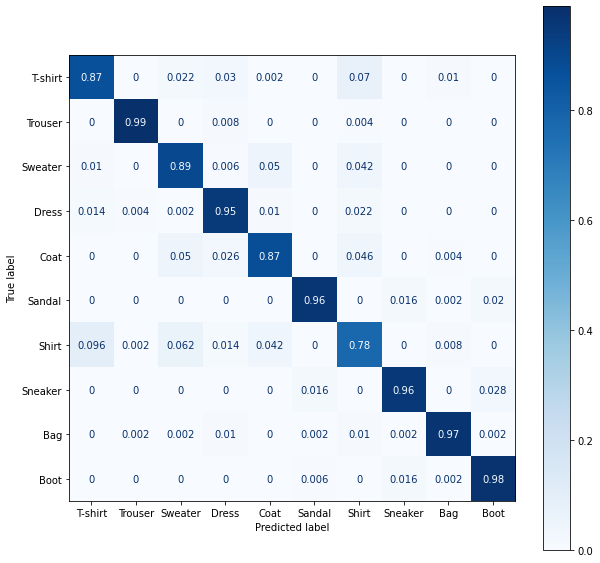

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = (10,10)

correct = (y_train == predict(x_train)).sum().item()
accuracy = (correct/5000)
print(f'학습 데이터 점수:{accuracy}')

correct = (y_test == predict(x_test)).sum().item()
accuracy = (correct/5000)
print(f'평가 데이터 점수:{accuracy}')

cm = confusion_matrix(y_test, predict(x_test), normalize='true')
print(cm)

cm_display = ConfusionMatrixDisplay(cm, display_labels=images).plot(cmap=plt.cm.Blues)